In [1]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')

# 계층 클러스터링(Hierarchical Clustering)
계층 클러스터링 알고리즘은 데이터 간 계층을 기반으로 데이터 간 병합 또는 분할을 통해 해당 데이터 포인트가 속할 그룹을 결정한다. 계층 클러스터링은 크게 병합 계층 클러스터링(Agglomerative Hierarchical Clustering)과 분할 계층 클러스터링(Divisive Hierarchical Clustering)으로 나눌 수 있다.

병합 계층 클러스터링은 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작하는 방법이다. 예를 들어, 데이터 포인트가 100개 있다면 100개의 클러스터가 존재한다고 설정하는 것이다. 그리고 각 클러스터를 비교해서 클러스터간 유사도가 높을 경우에 두 개의 클러스터를 하나의 클러스터로 합치는 방법이다. 처음에는 다수의 클러스터로 시작하지만 결국에는 데이터 셋 전체가 하나의 클러스터로 묶이는 방법이다.

분할 계층 클러스터링은 병합 계층 클러스터링과는 반대로 전체 데이터셋을 하나의 클러스터로 설정하고 시작하는 방법이다. 예를 들어, 데이터 포인트가 100개 있을 때, 이 데이터셋 전체를 1개의 클러스터라고 설정하는 것이다. 그 이후, 클러스터 내부에서 가장 멀리 떨어진 데이터를 다른 클러스터로 분리하는 방법이다.
이런 과정을 반복해서 처음에는 1개의 클러스터로 시작했지만 마지막에는 클러스터가 데이터의 개수만큼 분리되는 방법이다.

계층 클러스터링 알고리즘을 활용해 주어진 데이터를 클러스터링해본다.

In [2]:
from sklearn.datasets import make_blobs  # 클러스터링용 가상 데이터를 사용하기 위해 import 한다.

X, y = make_blobs(n_samples=10, n_features=2, random_state=0)  # 클러스터링용 가상 데이터를 만든다.
X.shape, y.shape

((10, 2), (10,))

In [3]:
# 병합 계층 클러스터링
from sklearn.cluster import AgglomerativeClustering  # 병합 계층 클러스터링에 사용하기 위해 import 한다.

# 병합 계층 클러스터링 객체를 만든다.
# n_clusters 옵션은 구하려는 클러스터의 개수인데, 우선 데이터들이 서로 병합하지 않고, 각 데이터 포인트가 하나의
# 클러스터를 구성하는 단계를 보기위해 None으로 설정한다.
# n_clusters=None으로 설정하려면 distance_threshold 옵션을 0으로 설정해야 한다.
# linkage 옵션은 거리를 측정하는 방법을 single, complete, average 중에 하나로 지정한다.
# single: 모든 데이터 조합에 대해 거리를 측정해서 가장 작은 값을 구한다. 최소 거리 방법, 기본값
# complete: 모든 데이터 조합에 대해 거리를 측정해서 가장 큰 값을 구한다. 최장 거리 방법
# average: 모든 데이터 조합에 대해 거리를 측정해서 평균 값을 구한다. 평균 거리 방법
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')
# AgglomerativeClustering는 predict 함수만 따로 제공하지 않아서 fit_predict() 함수를 사용한다.
label_agg = agg.fit_predict(X)  # 적합 후 예측한다.
label_agg

array([7, 9, 5, 8, 3, 4, 1, 6, 2, 0])

In [4]:
# 클러스터 2개로 병합
agg2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
label_agg2 = agg2.fit_predict(X)
label_agg2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [5]:
# 클러스터 3개로 병합
agg3 = AgglomerativeClustering(n_clusters=3, linkage='complete')
label_agg3 = agg3.fit_predict(X)
label_agg3

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 0])

1.1.1


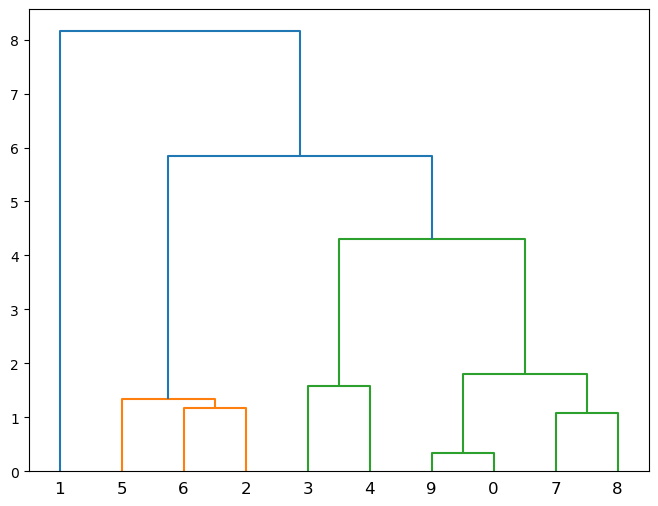

In [6]:
import sklearn

print(sklearn.__version__)
# 덴드로그램(Dendrogram) 시각화
# 계층적 클러스터링 결과를 트리 구조로 나타낸 그림을 덴드로그램이라 한다.
# sklearn 라이브러리 0.24.x 버전에서는 덴드로그램을 제공하지 않으므로 scipy 라이브러리를 사용한다.
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])
linked = linkage(X, 'complete')
dendrogram(linked, orientation='top', labels=label_agg, show_leaf_counts=True)
plt.show()